# Multiple linear regression

## Grading the professor

Many college courses conclude by giving students the opportunity to evaluate the course and the instructor anonymously. However, the use of these student evaluations as an indicator of course quality and teaching effectiveness is often criticized because these measures may reflect the influence of non-teaching related characteristics, such as the physical appearance of the instructor. The article titled, “Beauty in the classroom: instructors’ pulchritude and putative pedagogical productivity” (Hamermesh and Parker, 2005) found that instructors who are viewed to be better looking receive higher instructional ratings. (Daniel S. Hamermesh, Amy Parker, Beauty in the classroom: instructors pulchritude and putative pedagogical productivity, _Economics of Education Review_, Volume 24, Issue 4, August 2005, Pages 369-376, ISSN 0272-7757, 10.1016/j.econedurev.2004.07.013. http://www.sciencedirect.com/science/article/pii/S0272775704001165.)

In this lab we will analyze the data from this study in order to learn what goes into a positive professor evaluation.  

## The data

The data were gathered from end of semester student evaluations for a large sample of professors from the University of Texas at Austin. In addition, six students rated the professors’ physical appearance. (This is aslightly modified version of the original data set that was released as part of the replication data for _Data Analysis Using Regression and Multilevel/Hierarchical Models_ (Gelman and Hill, 2007).) The result is a data frame where each row contains a different course and columns represent variables about the courses and professors.

In [35]:
%matplotlib inline

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

df = pd.read_csv("../datasets/evals.csv")
df.head()

,course_id,prof_id,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,...,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
0,1,1,4.7,tenure track,minority,female,english,36,55.81395,24,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
1,2,1,4.1,tenure track,minority,female,english,36,68.80000,86,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
2,3,1,3.9,tenure track,minority,female,english,36,60.80000,76,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
3,4,1,4.8,tenure track,minority,female,english,36,62.60163,77,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
4,5,2,4.6,tenured,not minority,male,english,59,85.00000,17,...,multi credit,4,4,2,2,3,3,3.0,not formal,color


## Exploring the data

### Exercise 1 - Is this an observational study or an experiment? The original research question posed in the paper is whether beauty leads directly to the differences in course evaluations. Given the study design, is it possible to answer this question as it is phrased? If not, rephrase the question.

This is observational, not an experiment. If it would be an experiment, we would need to divide into two groups and see that actually beauty leads to different evaluations.

### Exercise 2 - Describe the distribution of `score`. Is the distribution skewed? What does that tell you about how students rate courses? Is this what you expected to see? Why, or why not?

It is right skewed, and since we expect course's score to be high, I assume it is normal.

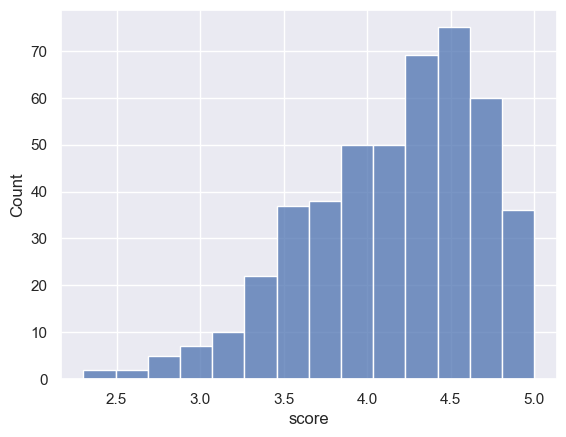

In [36]:
sns.histplot(df["score"])

plt.show()

### Exercise 3 - Excluding `score`, select two other variables and describe their relationship using an appropriate visualization (scatterplot, side-by-side boxplots, or mosaic plot).

Let's choose `age` and `beauty`.

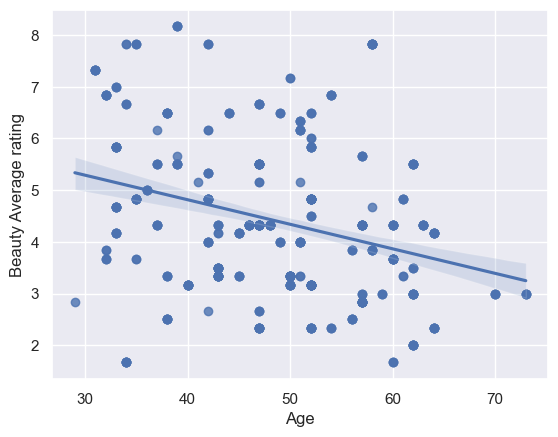

In [37]:
sns.regplot(x="age", y="bty_avg", data=df)

plt.xlabel("Age")
plt.ylabel("Beauty Average rating")

plt.show()

## Simple linear regression

The fundamental phenomenon suggested by the study is that better looking teachers are evaluated more favorably. Let's create a scatterplot to see if this appears to be the case:

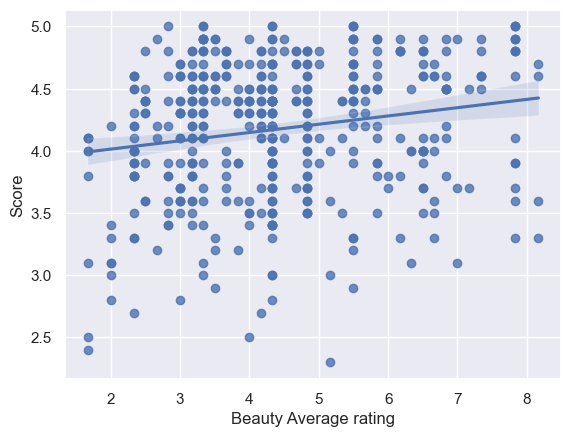

In [38]:
sns.regplot(x="bty_avg", y="score", data=df)

plt.xlabel("Beauty Average rating")
plt.ylabel("Score")

plt.show()

### Exercise 4 - Replot the scatterplot, but this time add jitter on the y- or the x-coordinate. What was misleading about the initial scatterplot?

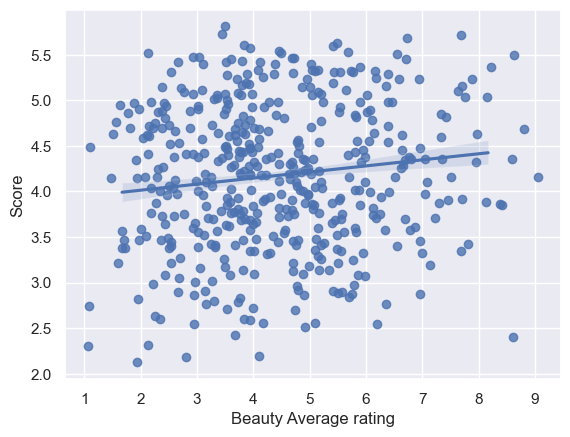

In [39]:
sns.regplot(x="bty_avg", y="score", x_jitter=1, y_jitter=1, data=df)

plt.xlabel("Beauty Average rating")
plt.ylabel("Score")

plt.show()

### Exercise 5 - Let’s see if the apparent trend in the plot is something more than natural variation. Fit a linear model called `m_bty` to predict average professor score by average beauty rating and add the line to your plot. Write out the equation for the linear model and interpret the slope. Is average beauty score a statistically significant predictor? Does it appear to be a practically significant predictor?

The regression equation is $score = 3.88 + 0.07 * bty\_avg$. The slope is 0.07. The intercept is 3.88. The slope is statistically significant according to the pvalue.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     16.73
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           5.08e-05
Time:                        21:39:44   Log-Likelihood:                -366.22
No. Observations:                 463   AIC:                             736.4
Df Residuals:                     461   BIC:                             744.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8803      0.076     50.961      0.000       3.731       4.030
bty_avg        0.0666      0.016      4.090      0.000       0.035       0.099
==============================================================================
Omnibus:                       33.007   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.797
Skew:                          -0.709   Prob(JB):                     3.76e-09
Kurtosis:                       3.007   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

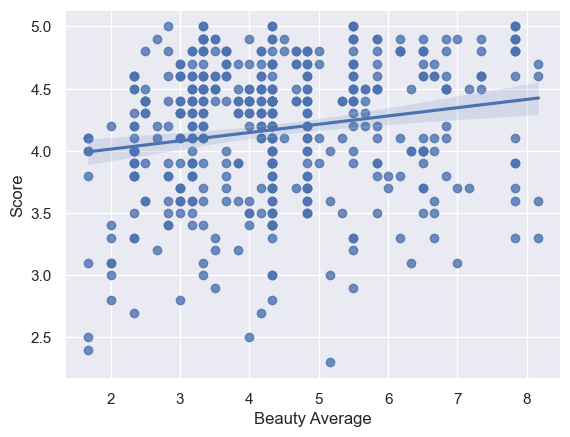

In [40]:
import statsmodels.api as sm

m_bty = sm.OLS.from_formula("score ~ bty_avg", data=df)
result_m_bty = m_bty.fit()

display(result_m_bty.summary())

sns.regplot(x="bty_avg", y="score", data=df)
plt.xlabel("Beauty Average")
plt.ylabel("Score")

plt.show()

### Exercise 6 - Use residual plots to evaluate whether the conditions of least squares regression are reasonable. Provide plots and comments for each one (see the Simple Regression Lab for a reminder of how to make these).

From the residuals plot we can see that the conditions are met.

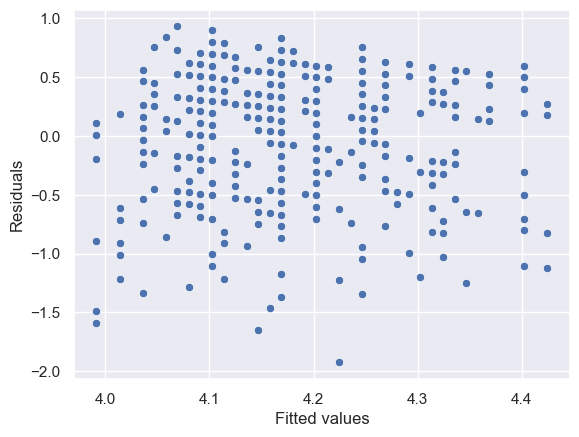

In [41]:
sns.scatterplot(x=result_m_bty.fittedvalues, y=result_m_bty.resid)

plt.xlabel("Fitted values")
plt.ylabel("Residuals")

plt.show()

## Multiple linear regression

The data set contains several variables on the beauty score of the professor: individual ratings from each of the six students who were asked to score the physical appearance of the professors and the average of these six scores. Let’s take a look at the relationship between one of these scores and the average beauty score.

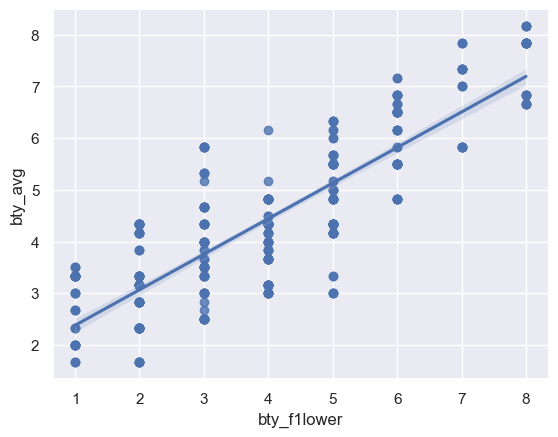

In [42]:
sns.regplot(x="bty_f1lower", y="bty_avg", data=df)

plt.show()

In [43]:
display(df[["bty_avg", "bty_f1lower"]].corr())

,bty_avg,bty_f1lower
bty_avg,1.000000,0.843911
bty_f1lower,0.843911,1.000000


As expected the relationship is quite strong - after all, the average score is calculated using the individual scores. We can actually take a look at the relationships between all beauty variables (columns 13 through 19) using the following command:

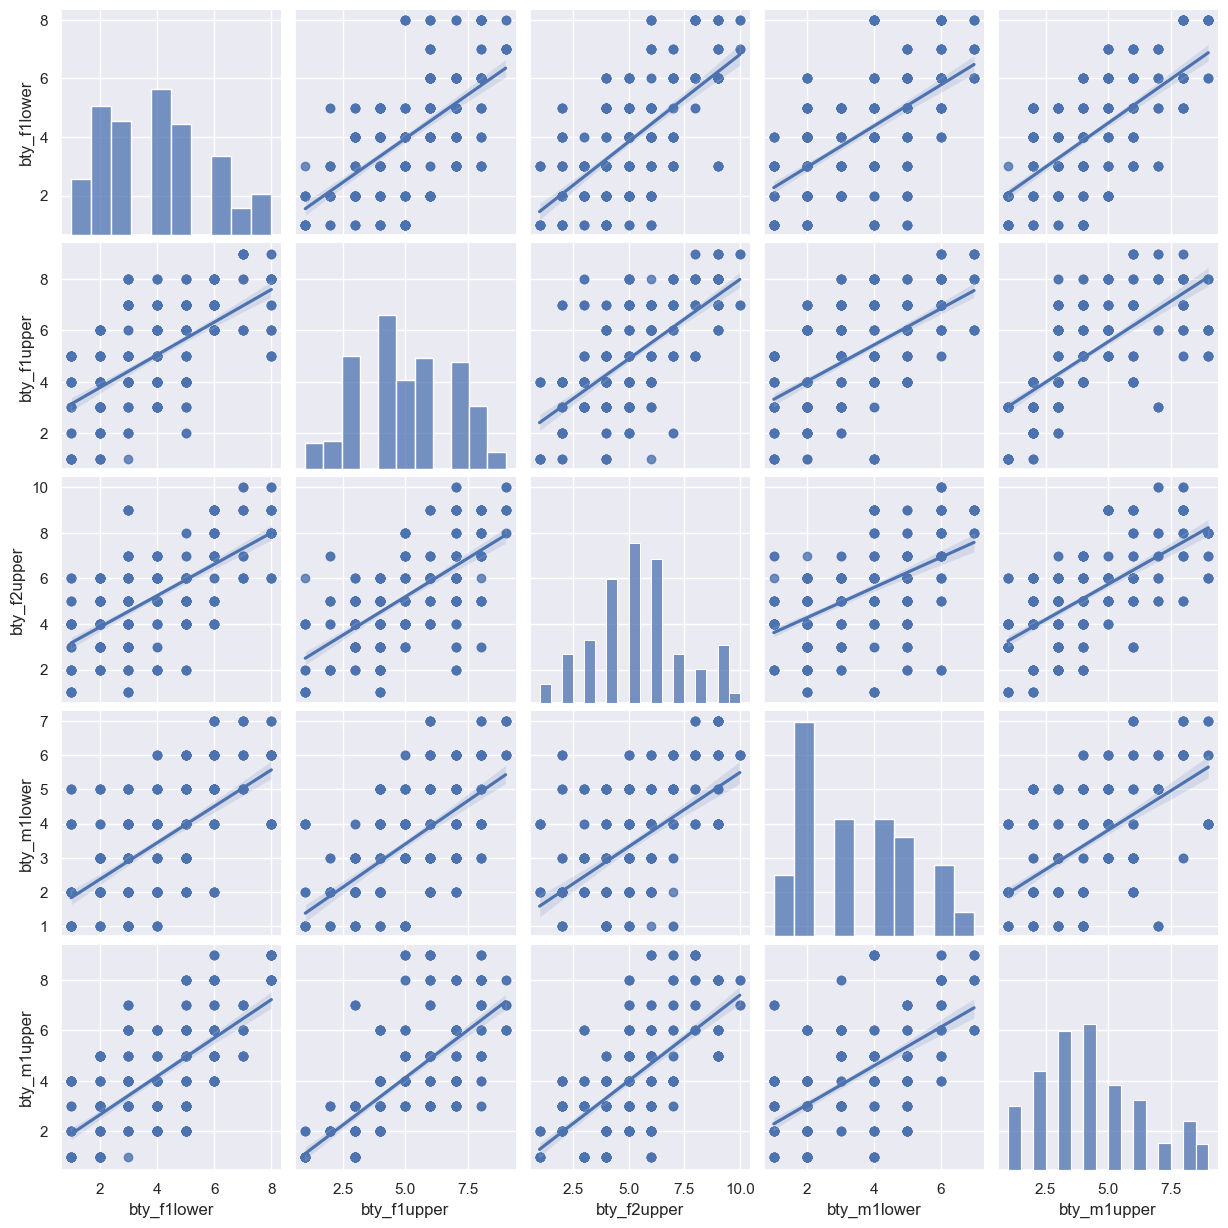

In [44]:
sns.pairplot(df.iloc[:, 12:19], kind="reg")

plt.show()

These variables are collinear (correlated), and adding more than one of these variables to the model would not add much value to the model. In this application and with these highly-correlated predictors, it is reasonable to use the average beauty score as the single representative of these variables.

In order to see if beauty is still a significant predictor of professor score after we’ve accounted for the gender of the professor, we can add the gender term into the model.

In [45]:
m_bty_gen = sm.OLS.from_formula("score ~ bty_avg + gender", data=df)
result_m_bty_gen = m_bty_gen.fit()

display(result_m_bty_gen.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     14.45
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           8.18e-07
Time:                        21:39:47   Log-Likelihood:                -360.37
No. Observations:                 463   AIC:                             726.7
Df Residuals:                     460   BIC:                             739.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7473      0.085     44.266      0.000       3.581       3.914
gender[T.male]     0.1724      0.050      3.433      0.001       0.074       0.271
bty_avg            0.0742      0.016      4.563      0.000       0.042       0.106
==============================================================================
Omnibus:                       30.145   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.960
Skew:                          -0.672   Prob(JB):                     2.56e-08
Kurtosis:                       2.925   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 7 - P-values and parameter estimates should only be trusted if the conditions for the regression are reasonable. Verify that the conditions for this model are reasonable using diagnostic plots.

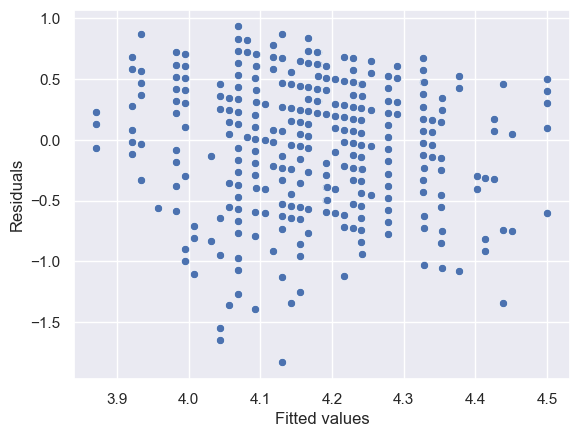

In [46]:
sns.scatterplot(x=result_m_bty_gen.fittedvalues, y=result_m_bty_gen.resid)

plt.xlabel("Fitted values")
plt.ylabel("Residuals")

plt.show()

The model seems reasonable.

### Exercise 8 - Is `bty_avg` still a significant predictor of `score`? Has the addition of `gender` to the model changed the parameter estimate for `bty_avg`?

The model seems to have the same parameter estimate for `bty_avg` when the `gender` is female.

### Exercise 9
What is the equation of the line corresponding to males? (Hint: For males, the parameter estimate is multiplied by 1.) For two professors who received the same beauty rating, which gender tends to have the higher course evaluation score?

For male professors the intercept is 3.91 which is bigger than the case of females, then gender who will get the highest rating is male.

### Exercise 10
Create a new model called `m_bty_rank` with `gender` removed and `rank` added in. Note that the rank variable has three levels: `teaching` , `tenure track` , `tenured`.

In [47]:
m_bty_rank = sm.OLS.from_formula("score ~ bty_avg + rank", data=df)
result_m_bty_rank = m_bty_rank.fit()

display(result_m_bty_rank.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     7.465
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           6.88e-05
Time:                        21:39:47   Log-Likelihood:                -363.45
No. Observations:                 463   AIC:                             734.9
Df Residuals:                     459   BIC:                             751.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.9815      0.091     43.860      0.000       3.803       4.160
rank[T.tenure track]    -0.1607      0.074     -2.173      0.030      -0.306      -0.015
rank[T.tenured]         -0.1262      0.063     -2.014      0.045      -0.249      -0.003
bty_avg                  0.0678      0.017      4.098      0.000       0.035       0.100
==============================================================================
Omnibus:                       31.962   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.454
Skew:                          -0.696   Prob(JB):                     7.36e-09
Kurtosis:                       2.925   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The interpretation of the coefficients in multiple regression is slightly different from that of simple regression. The estimate for `bty_avg` reflects how much higher a group of professors is expected to score if they have a beauty rating that is one point higher _while holding all other variables constant_. In this case, that translates into considering only professors of the same rank with `bty_avg` scores that are one point apart.

## The search for the best model

We will start with a full model that predicts professor score based on rank, ethnicity, gender, language of the university where they got their degree, age, proportion of students that filled out evaluations, class size, course level, number of professors, number of credits, average beauty rating, outfit, and picture color.

### Exercise 11 - Which variable would you expect to have the highest p-value in this model? Why? Hint: Think about which variable would you expect to not have any association with the professor score.

I would expect `pic_outfit` to have one of the highest p values.

Let's run the full model.

In [48]:
m_full = sm.formula.ols(formula = "score ~ rank + ethnicity + gender + language + age + cls_perc_eval + cls_students + cls_level + cls_profs + cls_credits + bty_avg + pic_outfit + pic_color", data = df)
multi_reg = m_full.fit()
display(multi_reg.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     7.366
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           6.55e-14
Time:                        21:39:47   Log-Likelihood:                -326.52
No. Observations:                 463   AIC:                             683.0
Df Residuals:                     448   BIC:                             745.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     4.0952      0.291     14.096      0.000       3.524       4.666
rank[T.tenure track]         -0.1476      0.082     -1.798      0.073      -0.309       0.014
rank[T.tenured]              -0.0973      0.066     -1.467      0.143      -0.228       0.033
ethnicity[T.not minority]     0.1235      0.079      1.571      0.117      -0.031       0.278
gender[T.male]                0.2109      0.052      4.071      0.000       0.109       0.313
language[T.non-english]      -0.2298      0.111     -2.063      0.040      -0.449      -0.011
cls_level[T.upper]            0.0605      0.058      1.051      0.294      -0.053       0.174
cls_profs[T.single]          -0.0147      0.052     -0.282      0.778      -0.117       0.088
cls_credits[T.one credit]     0.5020      0.116      4.330      0.000       0.274       0.730
pic_outfit[T.not formal]     -0.1127      0.074     -1.525      0.128      -0.258       0.033
pic_color[T.color]           -0.2173      0.072     -3.039      0.003      -0.358      -0.077
age                          -0.0090      0.003     -2.872      0.004      -0.015      -0.003
cls_perc_eval                 0.0053      0.002      3.461      0.001       0.002       0.008
cls_students                  0.0005      0.000      1.205      0.229      -0.000       0.001
bty_avg                       0.0400      0.018      2.287      0.023       0.006       0.074
==============================================================================
Omnibus:                       30.719   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.095
Skew:                          -0.666   Prob(JB):                     2.40e-08
Kurtosis:                       3.218   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Exercise 12 - Check your suspicions from the previous exercise. Include the model output in your response.

I would expect `pic_outfit` to have one of the highest p values, and there it is.

### Exercise 13 - Interpret the coefficient associated with the ethnicity variable.

The p-value is greater than the confidence level, so being in non minority is not associated with a highest rank.

### Exercise 14 - Drop the variable with the highest p-value and re-fit the model. Did the coefficients and significance of the other explanatory variables change? (One of the things that makes multiple regression interesting is that coefficient estimates depend on the other variables that are included in the model.) If not, what does this say about whether or not the dropped variable was collinear with the other explanatory variables?

Let us drop `cls_profs`.

In [58]:
m_except_cls_profs = sm.formula.ols(formula = "score ~ rank + ethnicity + gender + language + age + cls_perc_eval + cls_students + cls_level + cls_credits + bty_avg + pic_outfit + pic_color", data = df)
m_except_cls_profs_multi_reg = m_except_cls_profs.fit()
display(m_except_cls_profs_multi_reg.summary())

for c1 in multi_reg.params.index:
    for c2 in m_except_cls_profs_multi_reg.params.index:
        if c1 == c2:
            print(f"For {c1}:")
            print(multi_reg.params[c1], "became", m_except_cls_profs_multi_reg.params[c2])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     7.943
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           2.34e-14
Time:                        21:43:29   Log-Likelihood:                -326.56
No. Observations:                 463   AIC:                             681.1
Df Residuals:                     449   BIC:                             739.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     4.0873      0.289     14.150      0.000       3.520       4.655
rank[T.tenure track]         -0.1477      0.082     -1.801      0.072      -0.309       0.013
rank[T.tenured]              -0.0974      0.066     -1.470      0.142      -0.228       0.033
ethnicity[T.not minority]     0.1274      0.077      1.649      0.100      -0.024       0.279
gender[T.male]                0.2101      0.052      4.065      0.000       0.109       0.312
language[T.non-english]      -0.2283      0.111     -2.054      0.041      -0.447      -0.010
cls_level[T.upper]            0.0606      0.058      1.055      0.292      -0.052       0.174
cls_credits[T.one credit]     0.5061      0.115      4.404      0.000       0.280       0.732
pic_outfit[T.not formal]     -0.1083      0.072     -1.501      0.134      -0.250       0.034
pic_color[T.color]           -0.2191      0.071     -3.079      0.002      -0.359      -0.079
age                          -0.0090      0.003     -2.873      0.004      -0.015      -0.003
cls_perc_eval                 0.0053      0.002      3.453      0.001       0.002       0.008
cls_students                  0.0005      0.000      1.254      0.210      -0.000       0.001
bty_avg                       0.0399      0.017      2.281      0.023       0.006       0.074
==============================================================================
Omnibus:                       30.740   Durbin-Watson:                   1.413
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.120
Skew:                          -0.666   Prob(JB):                     2.37e-08
Kurtosis:                       3.219   Cond. No.                     1.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For Intercept:
4.095214079517501 became 4.087252318770008
For rank[T.tenure track]:
-0.14759324573574675 became -0.1476745779337142
For rank[T.tenured]:
-0.09733776239738115 became -0.09738288352193958
For ethnicity[T.not minority]:
0.12349292132039752 became 0.12744575960112417
For gender[T.male]:
0.21094812957850806 became 0.2101231413452062
For language[T.non-english]:
-0.2298111901466623 became -0.22828944718177255
For cls_level[T.upper]:
0.06051396024633657 became 0.06063743019200119
For cls_credits[T.one credit]:
0.5020431770305319 became 0.5061195518881583
For pic_outfit[T.not formal]:
-0.11268168706287597 became -0.10832274390392428
For pic_color[T.color]:
-0.2172629964240157 became -0.21905268570086256
For age:
-0.00900718963581819 became -0.008999185667310469
For cls_perc_eval:
0.005327241162925279 became 0.00528876472779252
For cls_students:
0.0004546339055612656 became 0.00046871617359945186
For bty_avg:
0.040033301660704394 became 0.03986288591441124


In general, we got no change in the parameter estimates and p values.

### Exercise 15 - Using backward-selection and p-value as the selection criterion, determine the best model. You do not need to show all steps in your answer, just the output for the final model. Also, write out the linear model for predicting score based on the final model you settle on.